<a href="https://colab.research.google.com/github/KendallScott/QTW/blob/main/Case%20Study%201/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from tabulate import tabulate
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from numpy import arange

In [ ]:
df = pd.read_csv('train.csv') 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20553 entries, 0 to 20552
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               20553 non-null  int64  
 1   mean_atomic_mass                 20553 non-null  float64
 2   wtd_mean_atomic_mass             20553 non-null  float64
 3   gmean_atomic_mass                20553 non-null  float64
 4   wtd_gmean_atomic_mass            20553 non-null  float64
 5   entropy_atomic_mass              20553 non-null  float64
 6   wtd_entropy_atomic_mass          20553 non-null  float64
 7   range_atomic_mass                20553 non-null  float64
 8   wtd_range_atomic_mass            20553 non-null  float64
 9   std_atomic_mass                  20553 non-null  float64
 10  wtd_std_atomic_mass              20553 non-null  float64
 11  mean_fie                         20553 non-null  float64
 12  wtd_mean_fie      

In [ ]:
unique = pd.read_csv('unique_m.csv') 
unique = unique.loc[:, unique.columns != 'critical_temp']
unique = unique.loc[:, unique.columns != 'material']

df=df.join(unique)

In [67]:
# Make target and predictive datasets
y = df[['critical_temp']]
X = df.loc[:, df.columns != 'critical_temp']

In [69]:
Scaler = StandardScaler()
X_Scaled= Scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns = X.columns)
y = pd.DataFrame(y)

In [70]:
X_Scaled= X_Scaled.dropna(axis='columns')
y= y.dropna(axis='columns')

In [76]:
regr = ElasticNet(random_state=0, alpha=.01)

# Create a 10-fold cross-validation 
cv = KFold(n_splits = 10, 
           shuffle = True, 
           random_state = 42)

MAE = []
MSE = []
RMSE = []
#i=0
for train, test in cv.split(X_Scaled, y):
    X_train, X_test = X_Scaled.iloc[train], X_Scaled.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    X_train, y_train = make_regression(n_features=2, random_state=0)
    
    regr.fit(X_Scaled, y)
    ElasticNet(random_state=0)

    # Predict 
    y_pred_lin_reg = regr.predict(X_test)
  
    # Calculate  mean squared error
    lin_MSE_reg= metrics.mean_squared_error(y_test, y_pred_lin_reg)

    i=i+1
    # Append to the list
    MSE.append(lin_MSE_reg)

    # Print the scores
    print(tabulate([[i, lin_MSE_reg, ]], 
               headers=['RMSE']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
25  270.997


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
26  270.545


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
27  319.858


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
28  275.368


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
29  289.583


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
30  274.252


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
31  311.729


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
32  277.339


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


       RMSE
--  -------
33  281.582
       RMSE
--  -------
34  288.441


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(regr, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_Scaled, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [73]:
lin_reg = LinearRegression()
# Create a 10-fold cross-validation 
cv = KFold(n_splits = 10, 
           shuffle = True, 
           random_state = 42)

MAE = []
MSE = []
RMSE = []
#i=0
for train, test in cv.split(X_Scaled, y):

    X_train, X_test = X_Scaled.iloc[train], X_Scaled.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    # Train the model
    lin_reg.fit(X_train, y_train)

    # Predict 
    y_pred_lin_reg = lin_reg.predict(X_test)


    # Calculate  mean squared error
    lin_MSE_reg= metrics.mean_squared_error(y_test, y_pred_lin_reg)

    i=i+1
    # Append to the list
    MSE.append(lin_MSE_reg)

    # Print the scores
    print(tabulate([[i, lin_MSE_reg, ]], 
               headers=['RMSE']))

       RMSE
--  -------
15  269.232
      RMSE
--  ------
16  274.39
       RMSE
--  -------
17  311.404
       RMSE
--  -------
18  268.132
       RMSE
--  -------
19  286.088
       RMSE
--  -------
20  268.758
       RMSE
--  -------
21  2952.03
       RMSE
--  -------
22  1318.03
       RMSE
--  -------
23  277.224
      RMSE
--  ------
24  283.03


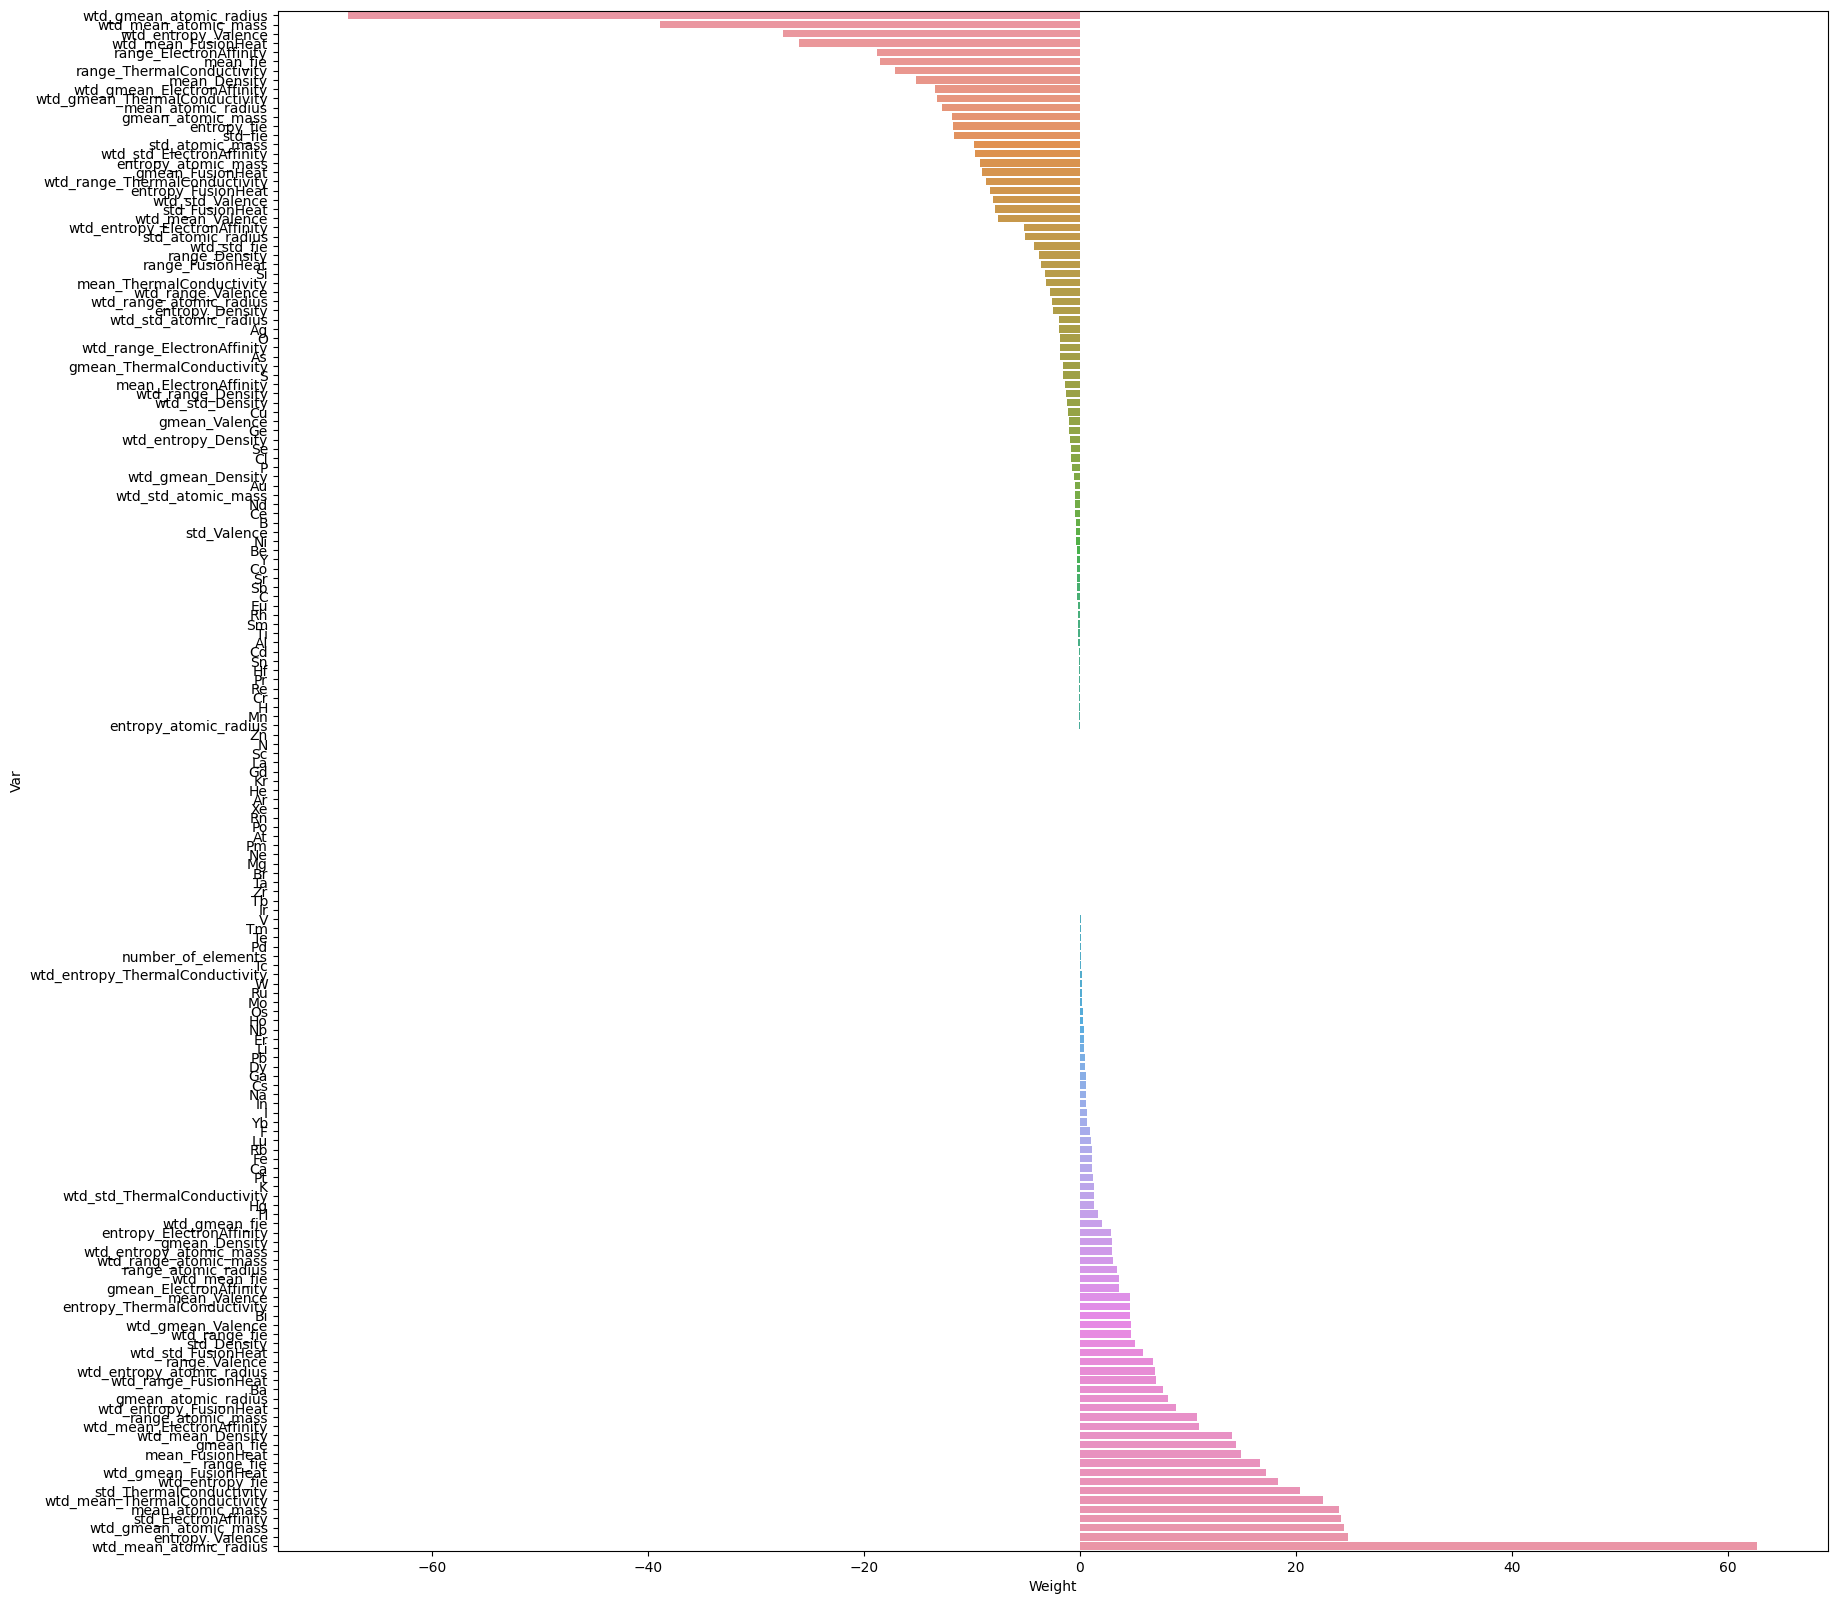

In [75]:
Weights = pd.Series(lin_reg.coef_[0], index = X_Scaled.columns)
Weights = pd.DataFrame({'Var':Weights.index, 'Weight':Weights.values})
Weights = Weights.sort_values('Weight')
plt.figure(figsize=(20, 20))
sns.barplot(x='Weight', y = 'Var', data = Weights);

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)

reg.fit(X_Scaled, y)

Lasso(alpha=0.1)

In [59]:
#choosing alpha, regularization strength (li_ratio is weighting)
#can update to elasticnet or elasticnetcv
alpha = 1 

for i in range(5):
 reg.alpha= alpha
 reg.fit(X_Scaled, y)
 # Predict 
 y_pred_lin_reg = reg.predict(X_Scaled)

 # Calculate  mean squared error
 lin_MSE= metrics.mean_squared_error(y, y_pred_lin_reg)
 print(alpha, lin_MSE)
 print('---')
 alpha= alpha/10

1 358.97390100633385
---
0.1 301.4966379362025
---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.281e+05, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


0.01 279.3817735356399
---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.410e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


0.001 277.5004610139068
---
0.0001 277.45017458176517
---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.888e+06, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X_Scaled = rng.randn(n_samples, n_features)
Ridge = Ridge(alpha=1.0)
Ridge.fit(X_Scaled, y)

Ridge()